# Plotting Tools

In [1]:
import os
import csv
import glob
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 

### Basic plotting example

In [2]:
# sensors = ['Mono_Inertial', 'rgbd','Stereo_Inertial', 'stereo']
sensors = ['stereo']

In [3]:
def plot_result(path, sensors): 
    file_list = glob.glob(path)
    sensors_file_list = [name for name in file_list if "FrameTrajectory_TUM" in name and "KeyFrame" not in name]
    print(sensors_file_list)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    for sensor in sensors:
        file = [name for name in file_list if sensor in name]
        print(sensor)
        f = np.loadtxt(file[0])
        x, y, z = f[:,1].astype(np.float), f[:,2].astype(np.float), f[:,3].astype(np.float)
        init = f[0,1:4].astype(np.float)
        end = f[-1,1:4].astype(np.float)
        error = np.sqrt(np.mean((end-init)**2))
        print(error)
        ax.plot3D(x, z, -y, label = sensor)

    ax.legend()
    ax.set_title('Comparison of ORBSLAM3 with different sensors')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel('z')
    fig.show()

['/home/yu/Documents/data/logs/orbslam3/FrameTrajectory_TUM_Format_stereo.txt']


<IPython.core.display.Javascript object>


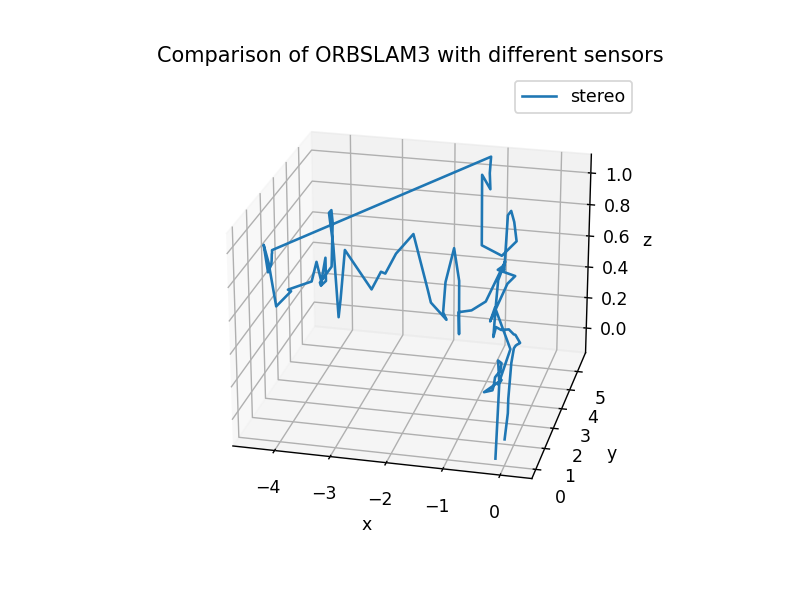

stereo
0.14035221311157392


In [4]:
plot_result('/home/yu/Documents/data/logs/orbslam3/*.txt', sensors)

['./slam_apartment_aggressive/FrameTrajectory_TUM_Format_Mono_Inertial.txt', './slam_apartment_aggressive/FrameTrajectory_TUM_Format_Stereo_Inertial.txt', './slam_apartment_aggressive/FrameTrajectory_TUM_Format_rgbd.txt', './slam_apartment_aggressive/FrameTrajectory_TUM_Format_stereo.txt']


<IPython.core.display.Javascript object>


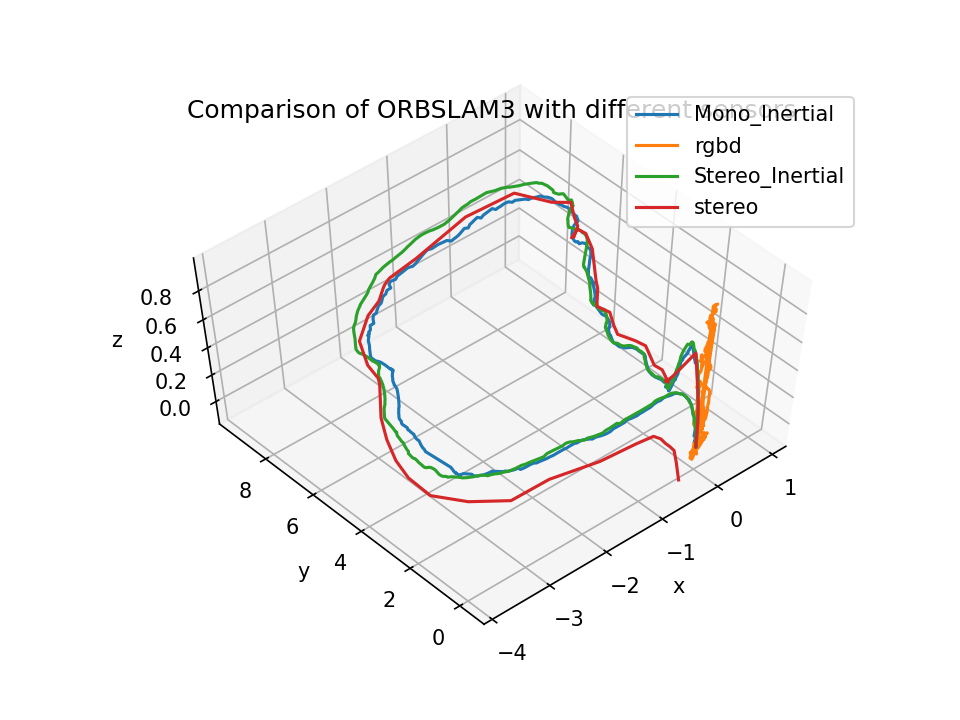

Mono_Inertial
0.010756287835346186
rgbd
0.028999264839391664
Stereo_Inertial
0.005061235029684026
stereo
0.23399418560922977


In [80]:
plot_result('./slam_apartment_aggressive/*.txt', sensors)